In [1]:
import cv2


In [2]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [3]:
len(flags)

346

In [4]:
flags[40]

'COLOR_BAYER_GR2GRAY'

In [5]:
import matplotlib.pyplot as plt
import numpy as np

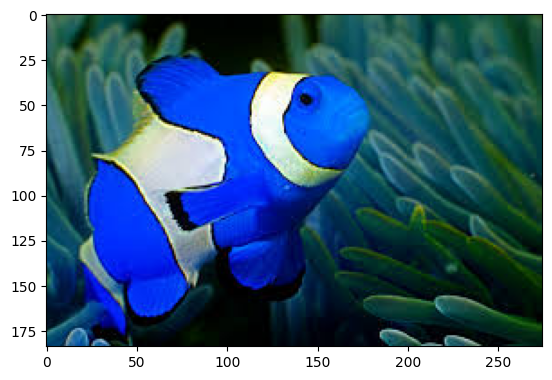

In [6]:
nemo = cv2.imread('nemo0.jpg')
plt.imshow(nemo)
plt.show()

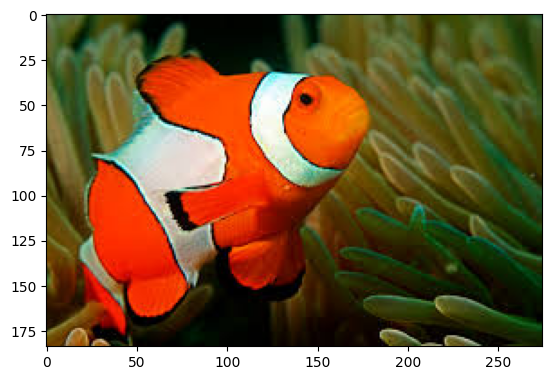

In [7]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [8]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [9]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [10]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [11]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

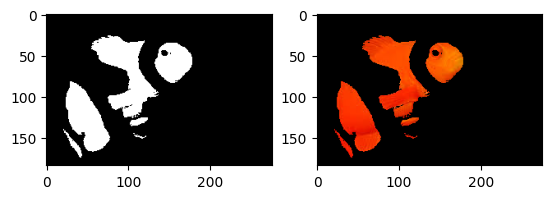

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [13]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

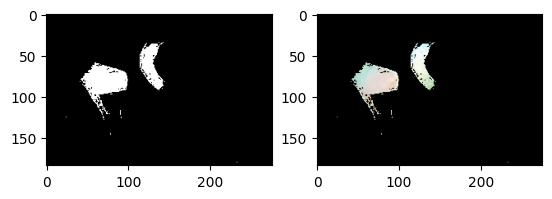

In [14]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

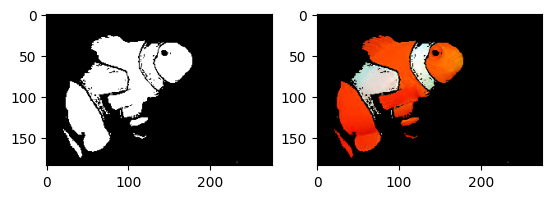

In [15]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

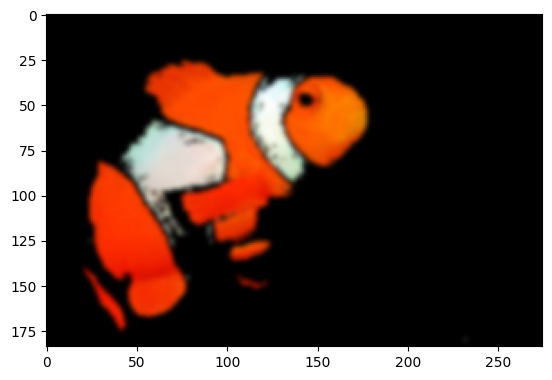

In [16]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

In [21]:
path = "nemo"

nemos_friends = []
for i in range(6):
   friend = cv2.cvtColor(cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   nemos_friends.append(friend)

In [22]:
def segment_fish(image):
    ''' Cегментация рыбы-клоуна из предоставленного изображения '''

    # Конвертация изображения в HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Установка оранжевого диапазона
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)

    # Применение оранжевой маски
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)

    # Установка белого диапазона
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Применение белой маски
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Объединение двух масок
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Сглаживание сегментации с помощью размытия
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

In [23]:
results = [segment_fish(friend) for friend in nemos_friends]

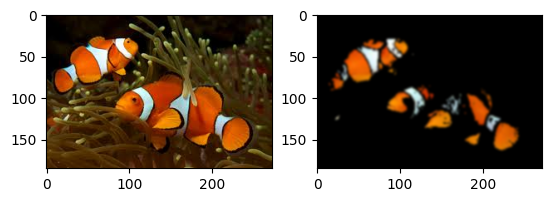

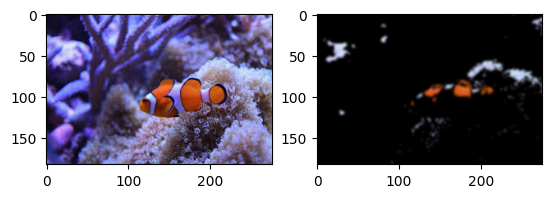

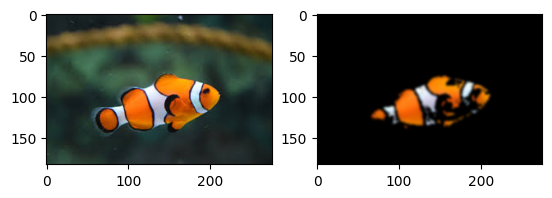

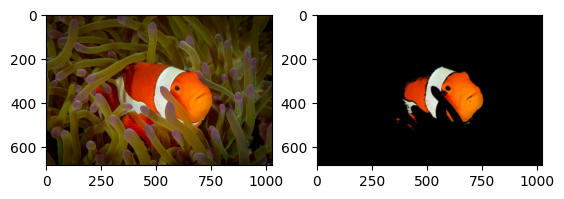

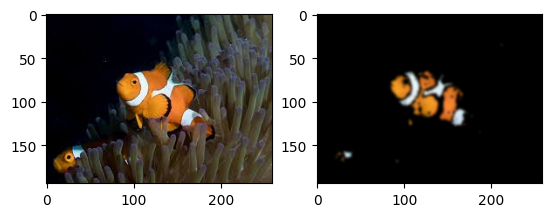

In [24]:
for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()